<a href="https://www.kaggle.com/code/hiranmayiguntur/xgboost-in-visa-application-process?scriptVersionId=147799562" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing all the essential libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reading the dataset 

In [2]:
df = pd.read_csv('/kaggle/input/visa-application/Visa_Applications_Agri.csv')

In [3]:
df.head()

,CASE_NUMBER,CASE_STATUS,DAYS,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_COUNTRY,TYPE_OF_REPRESENTATION,790A_ADDENDUM_B_ATTACHED,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,H-300-22231-426336,3,38,Individual Employer,N,Seasonal,N,UNITED STATES OF AMERICA,Agent,N,...,1,0,0,N,N,N,N,N,N,Y
1,H-300-22223-410500,2,48,Individual Employer,N,Seasonal,N,UNITED STATES OF AMERICA,Agent,N,...,1,3,0,N,Y,N,N,N,Y,N
2,H-300-22223-410821,2,52,Individual Employer,Y,Seasonal,N,UNITED STATES OF AMERICA,Attorney,Y,...,1,3,0,Y,Y,Y,Y,Y,Y,Y
3,H-300-22230-423268,2,20,Individual Employer,N,Seasonal,N,UNITED STATES OF AMERICA,Agent,N,...,1,3,0,N,Y,N,N,N,N,N
4,H-300-22230-423991,2,42,Joint Employer,N,Seasonal,N,UNITED STATES OF AMERICA,Agent,N,...,1,3,0,N,N,N,N,Y,Y,Y


In [4]:
df.shape

(17753, 35)

In [5]:
df.describe()

,CASE_STATUS,DAYS,TOTAL_WORKERS_NEEDED,TOTAL_WORKERS_H2A_REQUESTED,TOTAL_WORKERS_H2A_CERTIFIED,ANTICIPATED_NUMBER_OF_HOURS,WAGES_PER_HOUR,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS
count,17753.000000,17753.000000,17753.000000,17753.000000,17367.000000,17744.000000,17753.000000,17753.000000,17753.000000,17753.000000
mean,2.845153,27.488593,21.741058,17.538782,17.409397,44.215681,83.415359,1.021912,2.410916,0.033628
std,0.455756,13.912720,69.628631,53.158573,51.688077,7.417920,385.636911,0.151691,2.138582,0.863319
min,0.000000,0.000000,1.000000,1.000000,1.000000,30.000000,0.080000,1.000000,0.000000,0.000000
25%,3.000000,18.000000,2.000000,2.000000,2.000000,40.000000,13.880000,1.000000,1.000000,0.000000
50%,3.000000,27.000000,5.000000,5.000000,5.000000,40.000000,15.660000,1.000000,3.000000,0.000000
75%,3.000000,35.000000,14.000000,12.000000,12.000000,48.000000,17.330000,1.000000,3.000000,0.000000
max,3.000000,790.000000,2100.000000,2100.000000,2100.000000,105.000000,7000.000000,5.000000,72.000000,100.000000


In [6]:
df.columns 

Index(['CASE_NUMBER', 'CASE_STATUS', 'DAYS', 'TYPE_OF_EMPLOYER_APPLICATION',
       'H2A_LABOR_CONTRACTOR', 'NATURE_OF_TEMPORARY_NEED', 'EMERGENCY_FILING',
       'EMPLOYER_COUNTRY', 'TYPE_OF_REPRESENTATION',
       '790A_ADDENDUM_B_ATTACHED', 'WORK_CONTRACTS_ATTACHED',
       'EMPLOYER_MSPA_ATTACHED', 'SURETY_BOND_ATTACHED',
       'HOUSING_TRANSPORTATION', 'APPENDIX_A_ATTACHED',
       'JOINT_EMPLOYER_APPENDIX_A_ATTACHED', 'TOTAL_WORKERS_NEEDED',
       'TOTAL_WORKERS_H2A_REQUESTED', 'TOTAL_WORKERS_H2A_CERTIFIED',
       'EMPLOYMENT_BEGIN_DATE', 'EMPLOYMENT_END_DATE', 'ON_CALL_REQUIREMENT',
       'ANTICIPATED_NUMBER_OF_HOURS', 'WAGES_PER_HOUR',
       '790A_ADDENDUM_A_ATTACHED', 'EDUCATION_LEVEL', 'WORK_EXPERIENCE_MONTHS',
       'TRAINING_MONTHS', 'CERTIFICATION_REQUIREMENTS', 'DRIVER_REQUIREMENTS',
       'CRIMINAL_BACKGROUND_CHECK', 'DRUG_SCREEN',
       'ADDENDUM_B_WORKSITE_ATTACHED', 'ADDENDUM_B_HOUSING_ATTACHED',
       'ADDENDUM_C_ATTACHED'],
      dtype='object')

# Creating dummy variables for all the necessary categorical variables 

In [7]:
df_LC= pd.get_dummies(df['H2A_LABOR_CONTRACTOR'])
df= pd.concat([df_LC, df], axis=1)
df= df.rename(columns= {'N' : 'H2A_LABOR_CONTRACTOR_NO',
                           'Y' : 'H2A_LABOR_CONTRACTOR_YES',})
df.head(2)

,H2A_LABOR_CONTRACTOR_NO,H2A_LABOR_CONTRACTOR_YES,CASE_NUMBER,CASE_STATUS,DAYS,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,EMERGENCY_FILING,EMPLOYER_COUNTRY,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,H-300-22231-426336,3,38,Individual Employer,N,Seasonal,N,UNITED STATES OF AMERICA,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,H-300-22223-410500,2,48,Individual Employer,N,Seasonal,N,UNITED STATES OF AMERICA,...,1,3,0,N,Y,N,N,N,Y,N


In [8]:
df_NTN= pd.get_dummies(df['NATURE_OF_TEMPORARY_NEED'])
df= pd.concat([df_NTN, df], axis=1)
df= df.rename(columns= {'Other Temporary Need' : 'OTHER_TEMPORARY_NEED',
                           'Seasonal' : 'SEASONAL',})
df.head(2)

,OTHER_TEMPORARY_NEED,SEASONAL,H2A_LABOR_CONTRACTOR_NO,H2A_LABOR_CONTRACTOR_YES,CASE_NUMBER,CASE_STATUS,DAYS,TYPE_OF_EMPLOYER_APPLICATION,H2A_LABOR_CONTRACTOR,NATURE_OF_TEMPORARY_NEED,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,False,True,True,False,H-300-22231-426336,3,38,Individual Employer,N,Seasonal,...,1,0,0,N,N,N,N,N,N,Y
1,False,True,True,False,H-300-22223-410500,2,48,Individual Employer,N,Seasonal,...,1,3,0,N,Y,N,N,N,Y,N


In [9]:
df_EF= pd.get_dummies(df['EMERGENCY_FILING'])
df= pd.concat([df_EF, df], axis=1)
df= df.rename(columns= {'N' : 'EMERGENCY_FILING_NO',
                           'Y' : 'EMERGENCY_FILING_YES',})
df.head(2)

,EMERGENCY_FILING_NO,EMERGENCY_FILING_YES,OTHER_TEMPORARY_NEED,SEASONAL,H2A_LABOR_CONTRACTOR_NO,H2A_LABOR_CONTRACTOR_YES,CASE_NUMBER,CASE_STATUS,DAYS,TYPE_OF_EMPLOYER_APPLICATION,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,False,True,True,False,H-300-22231-426336,3,38,Individual Employer,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,False,True,True,False,H-300-22223-410500,2,48,Individual Employer,...,1,3,0,N,Y,N,N,N,Y,N


In [10]:
df_ABA= pd.get_dummies(df['790A_ADDENDUM_B_ATTACHED'])
df= pd.concat([df_ABA, df], axis=1)
df= df.rename(columns= {'Y' : '790A_ADDENDUM_B_ATTACHED_YES',
                           'N' : '790A_ADDENDUM_B_ATTACHED_NO',})
df.head(2)

,790A_ADDENDUM_B_ATTACHED_NO,790A_ADDENDUM_B_ATTACHED_YES,EMERGENCY_FILING_NO,EMERGENCY_FILING_YES,OTHER_TEMPORARY_NEED,SEASONAL,H2A_LABOR_CONTRACTOR_NO,H2A_LABOR_CONTRACTOR_YES,CASE_NUMBER,CASE_STATUS,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,False,True,True,False,H-300-22231-426336,3,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,False,True,True,False,H-300-22223-410500,2,...,1,3,0,N,Y,N,N,N,Y,N


In [11]:
df_AAA= pd.get_dummies(df['790A_ADDENDUM_A_ATTACHED'])
df= pd.concat([df_AAA, df], axis=1)
df= df.rename(columns= {'Y' : '790A_ADDENDUM_A_ATTACHED_YES',
                           'N' : '790A_ADDENDUM_A_ATTACHED_NO',})
df.head(2)

,790A_ADDENDUM_A_ATTACHED_NO,790A_ADDENDUM_A_ATTACHED_YES,790A_ADDENDUM_B_ATTACHED_NO,790A_ADDENDUM_B_ATTACHED_YES,EMERGENCY_FILING_NO,EMERGENCY_FILING_YES,OTHER_TEMPORARY_NEED,SEASONAL,H2A_LABOR_CONTRACTOR_NO,H2A_LABOR_CONTRACTOR_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,False,True,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,True,False,False,True,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [12]:
df_WCA= pd.get_dummies(df['WORK_CONTRACTS_ATTACHED'])
df= pd.concat([df_WCA, df], axis=1)
df= df.rename(columns= {'Y' : 'WORK_CONTRACTS_ATTACHED_YES',
                           'N' : 'WORK_CONTRACTS_ATTACHED_NO',})
df.head(2)

,WORK_CONTRACTS_ATTACHED_NO,WORK_CONTRACTS_ATTACHED_YES,790A_ADDENDUM_A_ATTACHED_NO,790A_ADDENDUM_A_ATTACHED_YES,790A_ADDENDUM_B_ATTACHED_NO,790A_ADDENDUM_B_ATTACHED_YES,EMERGENCY_FILING_NO,EMERGENCY_FILING_YES,OTHER_TEMPORARY_NEED,SEASONAL,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,False,True,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,True,False,True,False,False,True,...,1,3,0,N,Y,N,N,N,Y,N


In [13]:
df_SBA= pd.get_dummies(df['SURETY_BOND_ATTACHED'])
df= pd.concat([df_SBA, df], axis=1)
df= df.rename(columns= {'Y' : 'SURETY_BOND_ATTACHED_YES',
                           'N' : 'SURETY_BOND_ATTACHED_NO',})
df.head(2)

,SURETY_BOND_ATTACHED_NO,SURETY_BOND_ATTACHED_YES,WORK_CONTRACTS_ATTACHED_NO,WORK_CONTRACTS_ATTACHED_YES,790A_ADDENDUM_A_ATTACHED_NO,790A_ADDENDUM_A_ATTACHED_YES,790A_ADDENDUM_B_ATTACHED_NO,790A_ADDENDUM_B_ATTACHED_YES,EMERGENCY_FILING_NO,EMERGENCY_FILING_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,True,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [14]:
df_HT= pd.get_dummies(df['HOUSING_TRANSPORTATION'])
df= pd.concat([df_HT, df], axis=1)
df= df.rename(columns= {'Y' : 'HOUSING_TRANSPORTATION_YES',
                           'N' : 'HOUSING_TRANSPORTATION_NO',})
df.head(2)

,HOUSING_TRANSPORTATION_NO,HOUSING_TRANSPORTATION_YES,SURETY_BOND_ATTACHED_NO,SURETY_BOND_ATTACHED_YES,WORK_CONTRACTS_ATTACHED_NO,WORK_CONTRACTS_ATTACHED_YES,790A_ADDENDUM_A_ATTACHED_NO,790A_ADDENDUM_A_ATTACHED_YES,790A_ADDENDUM_B_ATTACHED_NO,790A_ADDENDUM_B_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,True,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [15]:
df_AAA= pd.get_dummies(df['APPENDIX_A_ATTACHED'])
df= pd.concat([df_AAA, df], axis=1)
df= df.rename(columns= {'Y' : 'APPENDIX_A_ATTACHED_YES',
                           'N' : 'APPENDIX_A_ATTACHED_NO',})
df.head(2)

,APPENDIX_A_ATTACHED_NO,APPENDIX_A_ATTACHED_YES,HOUSING_TRANSPORTATION_NO,HOUSING_TRANSPORTATION_YES,SURETY_BOND_ATTACHED_NO,SURETY_BOND_ATTACHED_YES,WORK_CONTRACTS_ATTACHED_NO,WORK_CONTRACTS_ATTACHED_YES,790A_ADDENDUM_A_ATTACHED_NO,790A_ADDENDUM_A_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,False,True,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,False,True,True,False,True,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [16]:
df_JE_AAA= pd.get_dummies(df['JOINT_EMPLOYER_APPENDIX_A_ATTACHED'])
df= pd.concat([df_JE_AAA, df], axis=1)
df= df.rename(columns= {'Y' : 'JOINT_EMPLOYER_APPENDIX_A_ATTACHED_YES',
                           'N' : 'JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO',})
df.head(2)

,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_YES,APPENDIX_A_ATTACHED_NO,APPENDIX_A_ATTACHED_YES,HOUSING_TRANSPORTATION_NO,HOUSING_TRANSPORTATION_YES,SURETY_BOND_ATTACHED_NO,SURETY_BOND_ATTACHED_YES,WORK_CONTRACTS_ATTACHED_NO,WORK_CONTRACTS_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,False,True,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,False,True,True,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [17]:
df_OCR= pd.get_dummies(df['ON_CALL_REQUIREMENT'])
df= pd.concat([df_OCR, df], axis=1)
df= df.rename(columns= {'Y' : 'ON_CALL_REQUIREMENT_YES',
                           'N' : 'ON_CALL_REQUIREMENT_NO',})
df.head(2)

,ON_CALL_REQUIREMENT_NO,ON_CALL_REQUIREMENT_YES,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_YES,APPENDIX_A_ATTACHED_NO,APPENDIX_A_ATTACHED_YES,HOUSING_TRANSPORTATION_NO,HOUSING_TRANSPORTATION_YES,SURETY_BOND_ATTACHED_NO,SURETY_BOND_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,False,True,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,False,True,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [18]:
df_CR= pd.get_dummies(df['CERTIFICATION_REQUIREMENTS'])
df= pd.concat([df_CR, df], axis=1)
df= df.rename(columns= {'Y' : 'CERTIFICATION_REQUIREMENTS_YES',
                           'N' : 'CERTIFICATION_REQUIREMENTS_NO',})
df.head(2)

,CERTIFICATION_REQUIREMENTS_NO,CERTIFICATION_REQUIREMENTS_YES,ON_CALL_REQUIREMENT_NO,ON_CALL_REQUIREMENT_YES,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_YES,APPENDIX_A_ATTACHED_NO,APPENDIX_A_ATTACHED_YES,HOUSING_TRANSPORTATION_NO,HOUSING_TRANSPORTATION_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,False,True,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,True,False,False,True,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [19]:
df_DR= pd.get_dummies(df['DRIVER_REQUIREMENTS'])
df= pd.concat([df_DR, df], axis=1)
df= df.rename(columns= {'Y' : 'DRIVER_REQUIREMENTS_YES',
                           'N' : 'DRIVER_REQUIREMENTS_NO',})
df.head(2)

,DRIVER_REQUIREMENTS_NO,DRIVER_REQUIREMENTS_YES,CERTIFICATION_REQUIREMENTS_NO,CERTIFICATION_REQUIREMENTS_YES,ON_CALL_REQUIREMENT_NO,ON_CALL_REQUIREMENT_YES,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_YES,APPENDIX_A_ATTACHED_NO,APPENDIX_A_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,False,True,...,1,0,0,N,N,N,N,N,N,Y
1,False,True,True,False,True,False,True,False,False,True,...,1,3,0,N,Y,N,N,N,Y,N


In [20]:
df_CBC= pd.get_dummies(df['CRIMINAL_BACKGROUND_CHECK'])
df= pd.concat([df_CBC, df], axis=1)
df= df.rename(columns= {'Y' : 'CRIMINAL_BACKGROUND_CHECK_YES',
                           'N' : 'CRIMINAL_BACKGROUND_CHECK_NO',})
df.head(2)

,CRIMINAL_BACKGROUND_CHECK_NO,CRIMINAL_BACKGROUND_CHECK_YES,DRIVER_REQUIREMENTS_NO,DRIVER_REQUIREMENTS_YES,CERTIFICATION_REQUIREMENTS_NO,CERTIFICATION_REQUIREMENTS_YES,ON_CALL_REQUIREMENT_NO,ON_CALL_REQUIREMENT_YES,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,False,True,True,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [21]:
df_DS= pd.get_dummies(df['DRUG_SCREEN'])
df= pd.concat([df_DS, df], axis=1)
df= df.rename(columns= {'Y' : 'DRUG_SCREEN_YES',
                           'N' : 'DRUG_SCREEN_CHECK_NO',})
df.head(2)

,DRUG_SCREEN_CHECK_NO,DRUG_SCREEN_YES,CRIMINAL_BACKGROUND_CHECK_NO,CRIMINAL_BACKGROUND_CHECK_YES,DRIVER_REQUIREMENTS_NO,DRIVER_REQUIREMENTS_YES,CERTIFICATION_REQUIREMENTS_NO,CERTIFICATION_REQUIREMENTS_YES,ON_CALL_REQUIREMENT_NO,ON_CALL_REQUIREMENT_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,False,True,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [22]:
df_ABWA= pd.get_dummies(df['ADDENDUM_B_WORKSITE_ATTACHED'])
df= pd.concat([df_ABWA, df], axis=1)
df= df.rename(columns= {'Y' : 'ADDENDUM_B_WORKSITE_ATTACHED_YES',
                           'N' : 'ADDENDUM_B_WORKSITE_ATTACHED_NO',})
df.head(2)

,ADDENDUM_B_WORKSITE_ATTACHED_NO,ADDENDUM_B_WORKSITE_ATTACHED_YES,DRUG_SCREEN_CHECK_NO,DRUG_SCREEN_YES,CRIMINAL_BACKGROUND_CHECK_NO,CRIMINAL_BACKGROUND_CHECK_YES,DRIVER_REQUIREMENTS_NO,DRIVER_REQUIREMENTS_YES,CERTIFICATION_REQUIREMENTS_NO,CERTIFICATION_REQUIREMENTS_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,True,False,True,False,False,True,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [23]:
df_ABHA= pd.get_dummies(df['ADDENDUM_B_HOUSING_ATTACHED'])
df= pd.concat([df_ABHA, df], axis=1)
df= df.rename(columns= {'Y' : 'ADDENDUM_B_HOUSING_ATTACHED_YES',
                           'N' : 'ADDENDUM_B_HOUSING_ATTACHED_NO',})
df.head(2)


,ADDENDUM_B_HOUSING_ATTACHED_NO,ADDENDUM_B_HOUSING_ATTACHED_YES,ADDENDUM_B_WORKSITE_ATTACHED_NO,ADDENDUM_B_WORKSITE_ATTACHED_YES,DRUG_SCREEN_CHECK_NO,DRUG_SCREEN_YES,CRIMINAL_BACKGROUND_CHECK_NO,CRIMINAL_BACKGROUND_CHECK_YES,DRIVER_REQUIREMENTS_NO,DRIVER_REQUIREMENTS_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,True,False,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,False,True,True,False,True,False,True,False,False,True,...,1,3,0,N,Y,N,N,N,Y,N


In [24]:
df_ACA= pd.get_dummies(df['ADDENDUM_C_ATTACHED'])
df= pd.concat([df_ACA, df], axis=1)
df= df.rename(columns= {'Y' : 'ADDENDUM_C_ATTACHED_YES',
                           'N' : 'ADDENDUM_C_ATTACHED_NO',})
df.head(2)

,ADDENDUM_C_ATTACHED_NO,ADDENDUM_C_ATTACHED_YES,ADDENDUM_B_HOUSING_ATTACHED_NO,ADDENDUM_B_HOUSING_ATTACHED_YES,ADDENDUM_B_WORKSITE_ATTACHED_NO,ADDENDUM_B_WORKSITE_ATTACHED_YES,DRUG_SCREEN_CHECK_NO,DRUG_SCREEN_YES,CRIMINAL_BACKGROUND_CHECK_NO,CRIMINAL_BACKGROUND_CHECK_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,False,True,True,False,True,False,True,False,True,False,...,1,0,0,N,N,N,N,N,N,Y
1,True,False,False,True,True,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [25]:
df_ACA= pd.get_dummies(df['TYPE_OF_EMPLOYER_APPLICATION'])
df= pd.concat([df_ACA, df], axis=1)
df.head(2)

,Association - Agent,Association - Joint Employer,Association - Sole Employer,Individual Employer,Joint Employer,ADDENDUM_C_ATTACHED_NO,ADDENDUM_C_ATTACHED_YES,ADDENDUM_B_HOUSING_ATTACHED_NO,ADDENDUM_B_HOUSING_ATTACHED_YES,ADDENDUM_B_WORKSITE_ATTACHED_NO,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,False,False,False,True,False,False,True,True,False,True,...,1,0,0,N,N,N,N,N,N,Y
1,False,False,False,True,False,True,False,False,True,True,...,1,3,0,N,Y,N,N,N,Y,N


In [26]:
mode_val = df['TYPE_OF_REPRESENTATION'].mode()[0]
df['TYPE_OF_REPRESENTATION'] = df['TYPE_OF_REPRESENTATION'].fillna(mode_val)

In [27]:
#replace values with 1s and 0s

df['TYPE_OF_REPRESENTATION'] = df['TYPE_OF_REPRESENTATION'].replace({'Agent':1,'Attorney':0})


In [28]:
df_ACA= pd.get_dummies(df['EMPLOYER_COUNTRY'])
df= pd.concat([df_ACA, df], axis=1)
df.head(2)

,CANADA,OTHERS,UNITED STATES OF AMERICA,Association - Agent,Association - Joint Employer,Association - Sole Employer,Individual Employer,Joint Employer,ADDENDUM_C_ATTACHED_NO,ADDENDUM_C_ATTACHED_YES,...,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS,CERTIFICATION_REQUIREMENTS,DRIVER_REQUIREMENTS,CRIMINAL_BACKGROUND_CHECK,DRUG_SCREEN,ADDENDUM_B_WORKSITE_ATTACHED,ADDENDUM_B_HOUSING_ATTACHED,ADDENDUM_C_ATTACHED
0,False,False,True,False,False,False,True,False,False,True,...,1,0,0,N,N,N,N,N,N,Y
1,False,False,True,False,False,False,True,False,True,False,...,1,3,0,N,Y,N,N,N,Y,N


In [29]:
df.drop('OTHERS',axis=1,inplace=True)

# Deleting all the original columns since they have been assigned dummy values 

In [30]:
del df['H2A_LABOR_CONTRACTOR']
del df['NATURE_OF_TEMPORARY_NEED']
del df['EMERGENCY_FILING']
del df['790A_ADDENDUM_A_ATTACHED']
del df['WORK_CONTRACTS_ATTACHED']
del df['HOUSING_TRANSPORTATION']
del df['APPENDIX_A_ATTACHED']
del df['JOINT_EMPLOYER_APPENDIX_A_ATTACHED']
del df['ON_CALL_REQUIREMENT']
del df['790A_ADDENDUM_B_ATTACHED']
del df['CERTIFICATION_REQUIREMENTS']
del df['DRIVER_REQUIREMENTS']
del df['CRIMINAL_BACKGROUND_CHECK']
del df['DRUG_SCREEN']
del df['ADDENDUM_B_WORKSITE_ATTACHED']
del df['ADDENDUM_B_HOUSING_ATTACHED']
del df['ADDENDUM_C_ATTACHED']
del df['TYPE_OF_EMPLOYER_APPLICATION']
del df['EMPLOYER_COUNTRY']
del df['TYPE_OF_REPRESENTATION']
del df['EMPLOYER_MSPA_ATTACHED']
del df['SURETY_BOND_ATTACHED']
del df['TOTAL_WORKERS_NEEDED']
del df['CASE_NUMBER']
del df['TOTAL_WORKERS_H2A_CERTIFIED']
del df['ANTICIPATED_NUMBER_OF_HOURS']

In [31]:
df.shape

(17753, 52)

# Checking empty values 

In [32]:
df.head()

,CANADA,UNITED STATES OF AMERICA,Association - Agent,Association - Joint Employer,Association - Sole Employer,Individual Employer,Joint Employer,ADDENDUM_C_ATTACHED_NO,ADDENDUM_C_ATTACHED_YES,ADDENDUM_B_HOUSING_ATTACHED_NO,...,H2A_LABOR_CONTRACTOR_YES,CASE_STATUS,DAYS,TOTAL_WORKERS_H2A_REQUESTED,EMPLOYMENT_BEGIN_DATE,EMPLOYMENT_END_DATE,WAGES_PER_HOUR,EDUCATION_LEVEL,WORK_EXPERIENCE_MONTHS,TRAINING_MONTHS
0,False,True,False,False,False,True,False,False,True,True,...,False,3,38,6,01-11-2022,28-08-2023,12.45,1,0,0
1,False,True,False,False,False,True,False,True,False,False,...,False,2,48,6,25-10-2022,01-06-2023,16.47,1,3,0
2,False,True,False,False,False,True,False,False,True,False,...,True,2,52,21,19-10-2022,10-04-2023,12.41,1,3,0
3,False,True,False,False,False,True,False,True,False,True,...,False,2,20,1,01-11-2022,31-03-2023,12.45,1,3,0
4,False,True,False,False,False,False,True,False,True,False,...,False,2,42,30,01-11-2022,30-06-2023,15.66,1,3,0


In [33]:
df['EMPLOYMENT_BEGIN_DATE'] = pd.to_datetime(df['EMPLOYMENT_BEGIN_DATE'], format="%d-%m-%Y")
df['EMPLOYMENT_END_DATE'] = pd.to_datetime(df['EMPLOYMENT_END_DATE'], format="%d-%m-%Y")

In [34]:
df['EMPLOYEMENT_DAYS'] = (df['EMPLOYMENT_END_DATE'] - df['EMPLOYMENT_BEGIN_DATE']).dt.days

In [35]:
del df['EMPLOYMENT_END_DATE']
del df['EMPLOYMENT_BEGIN_DATE']

In [36]:
df['WAGES_PER_HOUR'] = df['WAGES_PER_HOUR'].astype(float)

# Oversampling

In [37]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [38]:
X = df.drop('CASE_STATUS', axis=1)  # Replace 'target_column' with the name of your target column
y = df['CASE_STATUS']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
segment_counts = df['CASE_STATUS'].value_counts()
pastel_colors = px.colors.qualitative.Pastel
fig_before = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,marker=dict(color=pastel_colors))])

fig_before

In [41]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

from imblearn.over_sampling import SMOTE

strategy = {0:15538, 1:15538, 2:15538, 3:15538}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
#X, y = resample.fit_resample(X, y)

In [42]:
segment_counts = y.value_counts()
fig_after = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,marker=dict(color=pastel_colors))])

fig_after

# Predictive Models

### Decision Tree

In [43]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred_dt = model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.920


### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")

Random Forest Accuracy: 0.945


### XGBoost

In [48]:
# Adjust class labels to start from 0
df['CASE_STATUS'] = df['CASE_STATUS'] - df['CASE_STATUS'].min()

# Split the dataset into features (X) and the target variable (y)
X = df.drop('CASE_STATUS', axis=1)
y = df['CASE_STATUS']

In [49]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

In [51]:
# Train the model on the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xg = model_xgb.predict(X_test)

In [52]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xg)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.949


# Evaluation of the Model

### Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
labels = ["Denied", "Withdrawn","Expired","Accepted"]

In [54]:
# Ensure the same number of samples
min_samples = min(len(X), len(y))
true_labels = X[:min_samples]
predicted_labels = y[:min_samples]

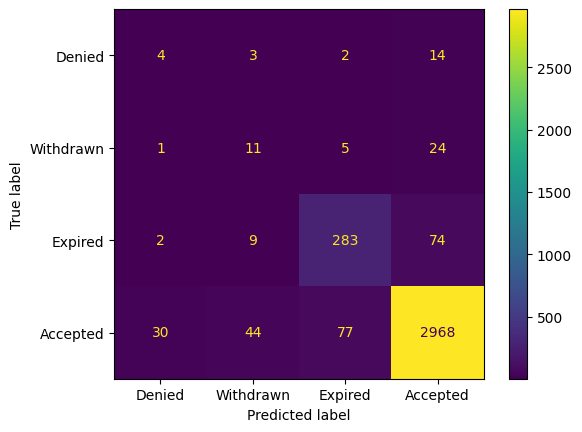

In [55]:
cm = confusion_matrix(y_test, y_pred_dt, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.11      0.17      0.13        23
           1       0.16      0.27      0.20        41
           2       0.77      0.77      0.77       368
           3       0.96      0.95      0.96      3119

    accuracy                           0.92      3551
   macro avg       0.50      0.54      0.52      3551
weighted avg       0.93      0.92      0.92      3551



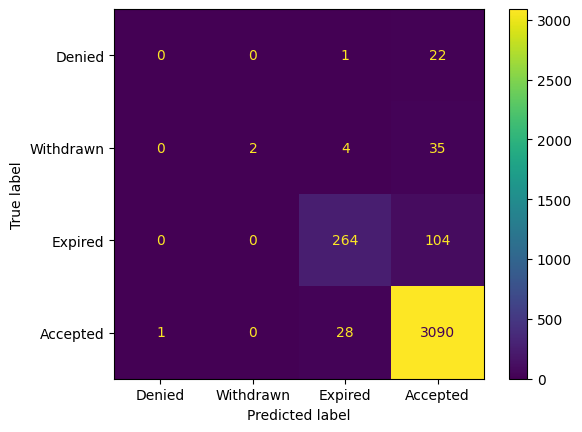

In [57]:
cm = confusion_matrix(y_test, y_pred_rf, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       1.00      0.05      0.09        41
           2       0.89      0.72      0.79       368
           3       0.95      0.99      0.97      3119

    accuracy                           0.95      3551
   macro avg       0.71      0.44      0.46      3551
weighted avg       0.94      0.95      0.94      3551



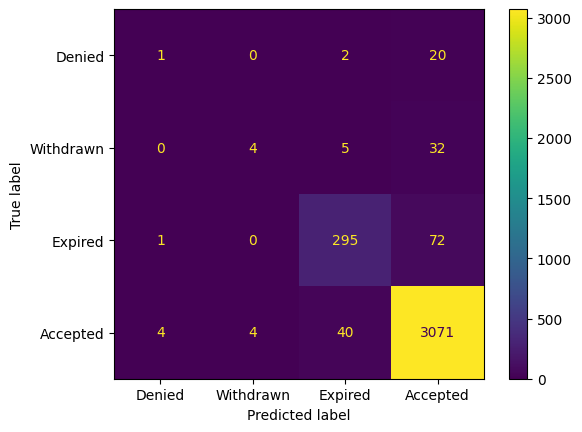

In [59]:
cm = confusion_matrix(y_test, y_pred_xg, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.17      0.04      0.07        23
           1       0.50      0.10      0.16        41
           2       0.86      0.80      0.83       368
           3       0.96      0.98      0.97      3119

    accuracy                           0.95      3551
   macro avg       0.62      0.48      0.51      3551
weighted avg       0.94      0.95      0.94      3551



### K-Fold Evaluation

In [61]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts

In [62]:
# Decision Tree Classifier
score_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
print(score_dt)
print("Avg :", np.average(score_dt))

[0.78434685 0.93693694 0.95833333 0.94591549 0.95380282 0.93521127
 0.91605634 0.84901408 0.83380282 0.77577465]
Avg : 0.8889194581905852


In [63]:
# Random Forest Score
score_rf=cross_val_score(RandomForestClassifier(n_estimators=100),X, y,cv=10)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.85304054 0.96058559 0.97240991 0.96112676 0.96732394 0.96507042
 0.94028169 0.87830986 0.87267606 0.83380282]
Avg : 0.9204627585331812


In [64]:
# XGBoost
score_xg = cross_val_score(xgb.XGBClassifier(), X, y, cv=10)
print(score_xg)
print("Avg :", np.average(score_xg))

[0.82376126 0.96171171 0.97353604 0.96507042 0.96957746 0.97070423
 0.94422535 0.88788732 0.87830986 0.8315493 ]
Avg : 0.9206332952670981


# Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters for each model
decision_tree_params = {'max_depth': [3, 5, 10]}

random_forest_params = {'n_estimators': [10, 20, 30],
                        'max_depth': [3, 5, 10],
                        'min_samples_split': [2, 5, 10]}

xgboost_params = {'n_estimators': [10, 20, 30],
                   'max_depth': [3, 5, 10],
                   'learning_rate': [0.01, 0.05, 0.1]}

In [66]:
# Create the models
decision_tree_clf = DecisionTreeClassifier()
random_forest_clf = RandomForestClassifier()
xgboost_clf = xgb.XGBClassifier()

In [67]:
# Create the grid search objects
decision_tree_gscv = GridSearchCV(decision_tree_clf, decision_tree_params, cv=10)
random_forest_gscv = GridSearchCV(random_forest_clf, random_forest_params, cv=10)
xgboost_gscv = GridSearchCV(xgboost_clf, xgboost_params, cv=10)

In [68]:
# Fit the models
decision_tree_gscv.fit(X, y)
random_forest_gscv.fit(X, y)
xgboost_gscv.fit(X, y)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...x_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [69]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {'max_depth': [3, 5, 10]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 20, 30],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'xgboost' : {
        'model': xgb.XGBClassifier(),
        'params': {
            'n_estimators': [10, 20, 30],
            'max_depth': [3, 5, 10],
            'learning_rate': [0.01, 0.05, 0.1]
        }
    }
}

In [70]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,decision_tree,0.877713,{'max_depth': 3}
1,random_forest,0.912349,"{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
2,xgboost,0.922263,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [71]:
xgboost_best = xgboost_gscv.best_estimator_

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgboost_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
23,JOINT_EMPLOYER_APPENDIX_A_ATTACHED_NO,0.493285
49,EMPLOYEMENT_DAYS,0.260474
45,WAGES_PER_HOUR,0.075666
41,H2A_LABOR_CONTRACTOR_NO,0.035676
43,DAYS,0.023690
39,OTHER_TEMPORARY_NEED,0.011281
27,HOUSING_TRANSPORTATION_NO,0.011104
17,DRIVER_REQUIREMENTS_NO,0.010731
37,EMERGENCY_FILING_NO,0.010365
47,WORK_EXPERIENCE_MONTHS,0.009851
